###############################################################################
# Data Cleaning and Pre-Processing

** This is the first section of importing the data and performing basic data

** cleaning and pre-processing. 

###############################################################################

In [0]:
import pandas as pd
import glob
import re
import numpy as np

# Importing Lexicon based packages 
from nltk.tokenize import sent_tokenize, TreebankWordTokenizer, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

import pickle

In [0]:
path = r'/content/drive/My Drive/Projects/Capstone Project/DATA/Text/Text/'
all_files = glob.glob(path + "*.txt")
all_files

['/content/drive/My Drive/Projects/Capstone Project/DATA/Text/Text/201002 PM.txt',
 '/content/drive/My Drive/Projects/Capstone Project/DATA/Text/Text/201102 PM.txt',
 '/content/drive/My Drive/Projects/Capstone Project/DATA/Text/Text/201203 PM.txt',
 '/content/drive/My Drive/Projects/Capstone Project/DATA/Text/Text/201302 PC.txt',
 '/content/drive/My Drive/Projects/Capstone Project/DATA/Text/Text/201407 AJ.txt',
 '/content/drive/My Drive/Projects/Capstone Project/DATA/Text/Text/201802 AJ.txt',
 '/content/drive/My Drive/Projects/Capstone Project/DATA/Text/Text/201702 AJ.txt',
 '/content/drive/My Drive/Projects/Capstone Project/DATA/Text/Text/201402 PC Int.txt',
 '/content/drive/My Drive/Projects/Capstone Project/DATA/Text/Text/201502 AJ.txt',
 '/content/drive/My Drive/Projects/Capstone Project/DATA/Text/Text/201602 AJ.txt',
 '/content/drive/My Drive/Projects/Capstone Project/DATA/Text/Text/201902 PG Int.txt',
 '/content/drive/My Drive/Projects/Capstone Project/DATA/Text/Text/201907 NS.tx

In [0]:
Speech_df = pd.DataFrame(columns=['Finance_Minister', 'Date', 'Speech'])
temp_df = pd.DataFrame(columns=['Finance_Minister', 'Date', 'Speech'])
Finance_Ministers=['Pranab Mukherjee', 'Piyush Goyal', 'P. Chidambaram', 'Arun Jaitley']


In [0]:

for document in all_files: 
  speech= open(document, encoding='cp1252').readlines()
  speech_nogap = list(map(lambda x : x.strip(), speech))
  speech = list(filter(lambda x: len(x)>0, speech_nogap))

  k=0
  for speaker in Finance_Ministers:
    k=0
    for search in speech:
      if speaker == search:
        #print('in')
        temp_df.Speech= speech[k+5:]
        temp_df.Date= str(speech[k+2])
        temp_df.Finance_Minister= str(speech[k])
      
      k=k+1 
  Speech_df=pd.concat([Speech_df, temp_df])
  temp_df.drop(temp_df.index, inplace=True)


      
      
speech= open('/content/drive/My Drive/Projects/Capstone Project/DATA/Text/Text/201907 NS.txt', encoding='cp1252').readlines()
speech_nogap = list(map(lambda x : x.strip(), speech))
speech = list(filter(lambda x: len(x)>0, speech_nogap))   

k=0
for search in speech:
  if search == 'Nirmala':
    temp_df.drop(temp_df.index, inplace=True)
    temp_df.Speech= speech[k+14:]
    temp_df.Date= 'July, 5, 2019'
    temp_df.Finance_Minister= 'Nirmala Sitharaman'
    #print('in')
  k=k+1
  Speech_df=pd.concat([Speech_df, temp_df])
  temp_df.drop(temp_df.index, inplace=True)


<Figure size 432x288 with 0 Axes>

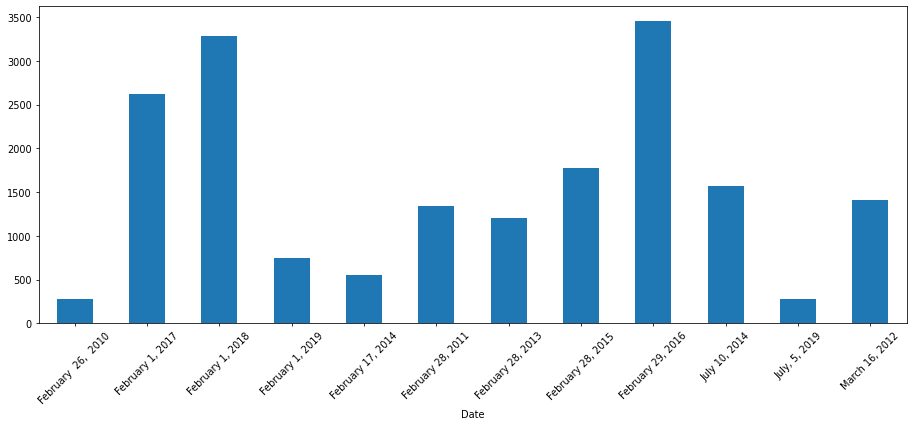

In [0]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(16, 6),dpi=70)
Speech_df.groupby('Date').size().plot(kind='bar')

plt.xticks(rotation=45)
plt.show() 

## Reason for a longer July 5th, 2019 speech is because of formating. Each word is in a single sentence. 

In [0]:
Speech_df

,Finance_Minister,Date,Speech
0,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budget i..."
1,Pranab Mukherjee,"February 26, 2010","2. It was not clear to us, as also to..."
2,Pranab Mukherjee,"February 26, 2010","3. At home, there was added uncertain..."
3,Pranab Mukherjee,"February 26, 2010","4. Today, as I stand before you, I ca..."
4,Pranab Mukherjee,"February 26, 2010",5. The three challenges and the mediu...
...,...,...,...
273,Nirmala Sitharaman,"July, 5, 2019","(a) Walnuts, tamarind dried, roasted gram, man..."
274,Nirmala Sitharaman,"July, 5, 2019",(a) Rough industrial diamonds including unsort...
275,Nirmala Sitharaman,"July, 5, 2019",I. 28% to 18%
276,Nirmala Sitharaman,"July, 5, 2019",(a) Services by way of admission to entertainm...


In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
add_stop_words= stopwords.words('english')
add_stop_words.extend(['Rs','n','I', '', 'http', 'indiabudget', 'nic' , 's', 'per' ,'Rs', 
                       'The' ,'This','year','cent','crore', 'propose', 'In', 'would', 'To', 'in', 
                       'also', 'lakh', 'Budget', 'years', 'A', 'duty', 'Government' ,'set', 'last' 
                       ,'It', 'percent', 'i', 'We', 'Madam', 'Speaker', 'sector', 'rise', 'present', 
                       'Union' , 'Budget','sector', 'th', 'time', 'proposed', 'service', 'crores', 'crore', 'year',
                       'government', 'shall', 'rate', 'new', 'sum', 'bcd' ,'as' , 'For' , 'On', 'As', 'How', 
                       'kharif', 'Mrs', 'Sonia','Gandhi','Prime','Minister','Dr','Manmohan','Singh','Mahatma','Gandhi',
'Satluj', 'Jal','Vidyut','Nigam','Shri','Kirit','Parikh','Gram','Sabhas','Rashtriya','Krishi','Vikas','Yojana',
                       'Nirman','Jawaharlal','Nehru', 'B','Kautilya', 
                       "Arun", "Jaitley", "Budget",'Minister','Speaker','Madam','Sir','dtype','Nmae','Clean',
              'Speech','India','Ju','page','CONTENTS','quo','allow','Name','ne','words','Length','seek',
              'scope','Pranab','Mukherjee','Chidambaram','Piyush','Goyal','Nirmala','Sitharaman',
             'year','po','stan','cha','object','pre','re','hold','speecha','wi','touc','presented','bs',
             'Budg','February','placed','eventuall','fu','far','positi','ear','provided','worl','facing',
             'year','sections','ago','popu','different','Indian','morning','Indi','happens','vel','yea',
             'said','let','gives','Nehru','Jawaharlal','remain','Anru','fi','VIII','VI','IX','VII','gr',
             'iv','Secto','deo','new','item','iii','Chapter','non','ii','ho','litre','years','Fe',
             'Naren','Shri','etc','adm','la','fina','august','month','July','july','Vivekananda','Swami',
             'Finance','relating','relati', 'NPS','cri','House','gra','kol','Roa','IMF','RWA','aa','AAI',
             'AAM','ab','AAR','abs','ACA','ad','ADR','AEC','AI','AIF','AMC','AP','APA','APT','ARC','ARCs',
             'AVGC','ATUFS','ASPIRE','hands','know','time','tomorrow','today','Today','eighth','seventh',
             'sure','day','eariler','agents','Note','means','given','Prime','run','Annex','write','found',
             'example','rest','Ahead','Annexes','Act','intent','gave','member','present','Thiruvalluvar',
             'present','joins','clear','taking', 'www', 'WWW','Speech_clean'] )

In [0]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "can not",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I had",
"i'd've": "I would have",
"i'll": "I will",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when has",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [0]:
for word in add_stop_words:
    if word.lower() in contractions:
        add_stop_words.remove(word)
        
add_stop_words.remove("not")        
#print(add_stop_words)

In [0]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
lemmatizer = WordNetLemmatizer()
clear_sentence=[]

for sentence in Speech_df.Speech: 
  sentence_1 = re.sub(r'[^A-Za-z]+', ' ', str(sentence))
  word_tokens = word_tokenize(sentence_1) 
  filtered_sentence = [w for w in word_tokens if not w in add_stop_words] 
  filtered_sentence = lemmatizer.lemmatize(' '.join(filtered_sentence))
  clear_sentence.append(filtered_sentence)

Speech_df['Speech_clean'] = clear_sentence

In [0]:
Speech_df

,Finance_Minister,Date,Speech,Speech_clean
0,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budget i...",interim regular economy grave uncertainties Gr...
1,Pranab Mukherjee,"February 26, 2010","2. It was not clear to us, as also to...",not us policy makers many countries crisis eve...
2,Pranab Mukherjee,"February 26, 2010","3. At home, there was added uncertain...",At home added uncertainty account delayed sub ...
3,Pranab Mukherjee,"February 26, 2010","4. Today, as I stand before you, I ca...",stand say confidence weathered crises well eco...
4,Pranab Mukherjee,"February 26, 2010",5. The three challenges and the mediu...,three challenges medium term perspective outli...
...,...,...,...,...
273,Nirmala Sitharaman,"July, 5, 2019","(a) Walnuts, tamarind dried, roasted gram, man...",Walnuts tamarind dried roasted gram mangoes sl...
274,Nirmala Sitharaman,"July, 5, 2019",(a) Rough industrial diamonds including unsort...,Rough industrial diamonds including unsorted r...
275,Nirmala Sitharaman,"July, 5, 2019",I. 28% to 18%,
276,Nirmala Sitharaman,"July, 5, 2019",(a) Services by way of admission to entertainm...,Services way admission entertainment events am...


In [0]:
Speech_df['Speech_clean'].replace('', np.nan, inplace=True)
Speech_df.dropna(subset=['Speech_clean'], inplace=True)
Speech_df

,Finance_Minister,Date,Speech,Speech_clean
0,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budget i...",interim regular economy grave uncertainties Gr...
1,Pranab Mukherjee,"February 26, 2010","2. It was not clear to us, as also to...",not us policy makers many countries crisis eve...
2,Pranab Mukherjee,"February 26, 2010","3. At home, there was added uncertain...",At home added uncertainty account delayed sub ...
3,Pranab Mukherjee,"February 26, 2010","4. Today, as I stand before you, I ca...",stand say confidence weathered crises well eco...
4,Pranab Mukherjee,"February 26, 2010",5. The three challenges and the mediu...,three challenges medium term perspective outli...
...,...,...,...,...
272,Nirmala Sitharaman,"July, 5, 2019","(a) Food items such as chikki, chutney powder ...",Food items chikki chutney powder b Fly ash fly...
273,Nirmala Sitharaman,"July, 5, 2019","(a) Walnuts, tamarind dried, roasted gram, man...",Walnuts tamarind dried roasted gram mangoes sl...
274,Nirmala Sitharaman,"July, 5, 2019",(a) Rough industrial diamonds including unsort...,Rough industrial diamonds including unsorted r...
276,Nirmala Sitharaman,"July, 5, 2019",(a) Services by way of admission to entertainm...,Services way admission entertainment events am...


In [0]:
Speech_df.to_pickle("/content/drive/My Drive/Projects/Capstone Project/Final Personal Capstone/Speech_df.pkl")